In [1]:
import plotly.dashboard_objs as dashboard
import plotly.plotly as py
import IPython.display
from IPython.display import Image
# py.sign_in(username='**',api_key='***')

In [2]:
import matplotlib.pyplot as plt
import plotly.tools as tls
import cufflinks as cf
import pandas as pd
my_dboard = dashboard.Dashboard()
cf.set_config_file(offline=False, world_readable=True, theme='space')

In [3]:
def fileId_from_url(url):
    """Return fileId from a url."""
    index = url.find('~')
    fileId = url[index + 1:]
    local_id_index = fileId.find('/')

    share_key_index = fileId.find('?share_key')
    if share_key_index == -1:
        return fileId.replace('/', ':')
    else:
        return fileId[:share_key_index].replace('/', ':')

def sharekey_from_url(url):
    """Return the sharekey from a url."""
    index = url.find('share_key=')
    return url[index + len('share_key='):]

In [4]:
## Load in data
import pandas as pd 
import os

path = './data'
aff_asylum = pd.read_csv(os.path.join(path, "affirmative_asylum.csv"),sep=',',thousands=',')
asylum_statistics = pd.read_csv(os.path.join(path, "asylum_statistics.csv"),thousands=',')
def_asylum = pd.read_csv(os.path.join(path, "defensive_asylum.csv"),thousands=',')
refugee_status = pd.read_csv(os.path.join(path, "refugee_status.csv"),thousands=',')

In [5]:
import re
import numpy as np
df_da = def_asylum
df_da = df_da.set_index('Continent/Country of Nationality')
df_da = df_da.transpose()
df_da = df_da.apply(lambda x: [re.sub('[A-Z-,]*','',x[i]) for i in range(len(x))])
# df_da = df_da.apply(lambda x: int(x))
df_da.replace(to_replace = '',value = np.nan,regex = True,inplace =True)
df_da = df_da.apply(lambda x: x.fillna(x.median()),axis=0)
df_da = df_da.astype('float')
## this gets rid of blank values and fills them with NaN and then fills in with the median/mean values...

In [12]:
%matplotlib inline
times = list(df_da.index)
# df_da.index = pd.to_datetime(times)
idx = 10
url_1 = df_da.iloc[:,0:idx].iplot(asUrl=True)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.title('Origin of individuals granted defensive asylum')
# plt.show()
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# plotly_fig = tls.mpl_to_plotly(fig)
file_Id_1 = fileId_from_url(url_1)

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [15]:
demographics = pd.read_csv('./data/unhcr_popstats_export_demographics_all_data.csv',skiprows=3)
demographics=demographics.convert_objects(convert_numeric=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [16]:
url_2 = demographics.groupby(['Location Name']).sum()[['F: Total'
                                               ,'M: Total']].sort_values(['F: Total','M: Total']
                                                                                   ,ascending=False)[0:20].iplot(kind ='bar',
                                                                                                               title='Location Population',asUrl=True)

file_Id_2 = fileId_from_url(url_2)

In [17]:
url_3 = demographics.groupby('Year').sum()[['F: Total','M: Total']].iplot(kind='area',fill='tozeroy',asUrl=True)
# ax2 = demographics.groupby('Year').sum()['].iplot(kind ='area',ax=ax,color = 'blue')
file_Id_3 = fileId_from_url(url_3)

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [ ]:
times = list(df_da.index)
# df_da.index = pd.to_datetime(times)
idx = 10
df_da.iloc[:,0:idx].plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Origin of individuals granted defensive asylum')
plt.show()
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [14]:
demographics.head()

NameError: name 'demographics' is not defined

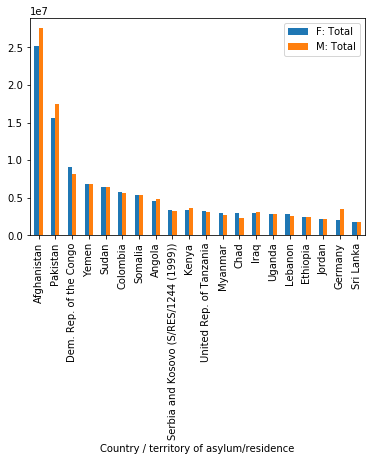

In [19]:
demographics.groupby(['Country / territory of asylum/residence']).sum()[['F: Total','M: Total']].sort_values(by=['F: Total','M: Total'],ascending=False)[0:20].plot(kind='bar')

In [22]:
url_4 = demographics['Country / territory of asylum/residence'].value_counts()[0:10].iplot(kind='bar',asUrl = True)
file_Id_4 = fileId_from_url(url_4)

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [23]:
demographics['Country / territory of asylum/residence'].value_counts()[0:10]

Pakistan                  1082
Turkey                     989
Sudan                      953
Cameroon                   891
Dem. Rep. of the Congo     811
Gabon                      591
Afghanistan                527
Iraq                       438
Chad                       369
Armenia                    337
Name: Country / territory of asylum/residence, dtype: int64

In [24]:
url_5 = demographics['Location Name'].value_counts()[0:10].iplot(kind='bar',color = 'blue',asUrl=True)
file_Id_5 = fileId_from_url(url_5)

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [ ]:
data_2= pd.read_csv('./data/unhcr_popstats_export_time_series_all_data.csv',parse_dates=['Year'])
data_2['Year'] = data_2['Year'].apply(lambda x: x.year)
data_2.dropna(axis = 0,inplace = True)

def if_numeric(val):
    try:
        return(int(val))
    except:
        return(np.nan)
data_2['Value'] = data_2['Value'].apply(if_numeric)

In [25]:
by_year = data_2.groupby(u'Year')['Value'].sum()
by_year = by_year.reset_index()
url_6 = by_year.iplot(x='Year',y='Value',asUrl=True)
file_Id_6 = fileId_from_url(url_6)
# plt.ylabel('Refugees')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [ ]:
by_year = data_2.groupby(u'Year')['Value'].sum()
by_year = by_year.reset_index()
by_year.plot('Year','Value')
plt.ylabel('Refugees')

In [ ]:
def one_country(data,country):
    #for a single country get everything
    country_df = data[data['Origin'] == country].groupby('Year').sum().reset_index()
    country_df.plot('Year','Value')
    return(country_df)

In [ ]:
afg_df = one_country(data_2,'Afghanistan')

In [ ]:
demographics.groupby('Location Name').count()['Country / territory of asylum/residence'].plot(kind='hist')

In [ ]:
demographics['Country / territory of asylum/residence'].value_counts()[0:10].plot(kind='bar')

In [ ]:

box_a = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': file_Id_1,
    'title': 'defensive asylum'
}


box_b = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': file_Id_2,
    'title': 'Male and Female by Location'
}


box_c = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': file_Id_3,
    'title': 'Male and Female by Year'
}


box_d = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': file_Id_4,
    'title': 'Top Location of Asylum'
}

box_e = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': file_Id_5,
    'title': 'Top location of Origin'
}


box_f = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': file_Id_6,
    'title': 'Time Series Trend'
}

In [ ]:
my_dboard.insert(box_f,box_id=1)
my_dboard.insert(box_a,side='right',box_id=1)
my_dboard.insert(box_b,side = 'below',box_id=2)
my_dboard.insert(box_c,side = 'below',box_id=3)
my_dboard.insert(box_d,side='below',box_id=1)
my_dboard.insert(box_e,side = 'below',box_id=2)

In [ ]:
# my_dboard.insert(box_d,side='below',box_id=1)
my_dboard.get_preview()

In [ ]:
my_dboard.clear()
my_dboard = dashboard.Dashboard()
cf.set_config_file(offline=False, world_readable=True, theme='seaborn')

In [8]:
my_dboard['settings']['title'] = 'Refugee Analysis'
py.dashboard_ops.upload(my_dboard, filename='Refugee Analysis')

'https://plot.ly/~cwczarnik/363/refugee-analysis/'

In [9]:
data_2.head()

NameError: name 'data_2' is not defined

In [10]:
df_2 =pd.merge(data_2,df,left_on = 'Country / territory of asylum/residence',right_on='COUNTRY')

NameError: name 'data_2' is not defined

In [ ]:
import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

data = [ dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'GDP<br>Billions US$'),
      ) ]

layout = dict(
    title = '2014 Global GDP<br>Source:\
            <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )